In [12]:
'''import pandas as pd
from geopy.distance import geodesic

# Step 1: Load the CSV file
df = pd.read_csv('intraCity.csv')

# Step 2: Function to calculate distance between two coordinates
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    # Calculate distance using geodesic
    return geodesic(store_coords, drop_coords).km

# Step 3: Apply the function to calculate distance for each row
df['Distance_km'] = df.apply(calculate_distance, axis=1)
df'''

"import pandas as pd\nfrom geopy.distance import geodesic\n\n# Step 1: Load the CSV file\ndf = pd.read_csv('intraCity.csv')\n\n# Step 2: Function to calculate distance between two coordinates\ndef calculate_distance(row):\n    store_coords = (row['Store_Latitude'], row['Store_Longitude'])\n    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])\n    # Calculate distance using geodesic\n    return geodesic(store_coords, drop_coords).km\n\n# Step 3: Apply the function to calculate distance for each row\ndf['Distance_km'] = df.apply(calculate_distance, axis=1)\ndf"

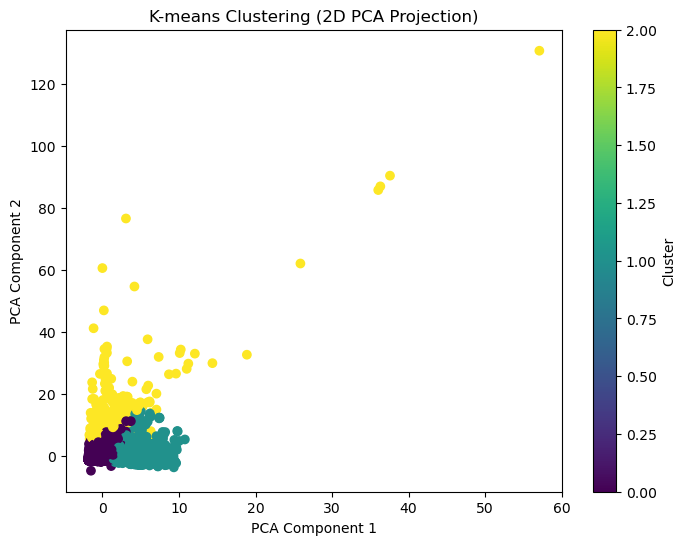

,data,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Sstate,Dstate,cluster
0,training,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,0
1,training,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,0
2,training,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,0
3,training,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,0
4,training,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104853,training,Sonipat_Kundli_H (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Haryana,Haryana,0
104854,training,Sonipat_Kundli_H (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Haryana,Haryana,0
104855,training,Sonipat_Kundli_H (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Haryana,Haryana,0
104856,training,Sonipat_Kundli_H (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,Haryana,Haryana,0


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
# Replace 'your_data.csv' with the actual path to your CSV file
df = pd.read_csv('train.csv')

# Step 2: Preprocess the data
# Selecting the relevant columns for clustering
clustering_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 
                      'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

# Convert these columns to numeric (if not already numeric)
df[clustering_columns] = df[clustering_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[clustering_columns])

# Step 4: Apply K-means clustering
num_clusters = 3  # For example, adjust this value as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=108)

# Fit the K-means model and get the cluster labels
df['cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Reduce dimensions for plotting (using PCA)
pca = PCA(n_components=2)  # Reducing data to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Step 6: Create a scatter plot with the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['cluster'], cmap='viridis', marker='o')
plt.title("K-means Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()
df
# Optionally, save the results to a new CSV file
# df.to_csv('clustered_data.csv', index=False)
